In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

In [236]:
df = pd.read_csv("DataBase.csv")
df

,dir,j_stn,nst_str,nst_end,redu_ratio,mstn,numb_stn,to_graph
0,sim_output\20210802-081705,2,12,17,0.00,0,0,1
1,sim_output\20210802-082627,2,12,17,0.05,0,0,1
2,sim_output\20210802-083730,2,12,17,0.10,0,0,1
3,sim_output\20210802-084617,2,12,17,0.15,0,0,1
4,sim_output\20210802-085502,2,12,17,0.20,0,0,1
...,...,...,...,...,...,...,...,...
522,sim_output\20210807-114919,52,5,6,0.80,0,0,0
523,sim_output\20210807-115723,52,5,6,1.00,0,0,0
524,sim_output\20210807-120527,52,5,7,0.20,0,0,0
525,sim_output\20210807-121331,52,5,7,0.40,0,0,0


In [400]:
low_thresh = 0.2
high_thresh = 0.8
extracted_df = df.query('(0<=redu_ratio<=@low_thresh or @high_thresh<=redu_ratio<1.00) and to_graph==1')
extracted_df

,dir,j_stn,nst_str,nst_end,redu_ratio,mstn,numb_stn,to_graph
0,sim_output\20210802-081705,2,12,17,0.00,0,0,1
1,sim_output\20210802-082627,2,12,17,0.05,0,0,1
2,sim_output\20210802-083730,2,12,17,0.10,0,0,1
3,sim_output\20210802-084617,2,12,17,0.15,0,0,1
4,sim_output\20210802-085502,2,12,17,0.20,0,0,1
...,...,...,...,...,...,...,...,...
283,sim_output\20210805-132106,42,4,9,0.80,0,0,1
285,sim_output\20210805-133705,42,5,6,0.20,0,0,1
288,sim_output\20210805-140106,42,5,6,0.80,0,0,1
289,sim_output\20210805-141707,42,5,7,0.20,0,0,1


,Time [Sec],id7_Blood pressure[mmHg],id7_Blood flow[ml/s],id7_Section area [cm^2],id7_Velocity [cm/s],id17_Blood pressure[mmHg],id17_Blood flow[ml/s],id17_Section area [cm^2],id17_Velocity [cm/s],id42_Blood pressure[mmHg],id42_Blood flow[ml/s],id42_Section area [cm^2],id42_Velocity [cm/s],id55_Blood pressure[mmHg],id55_Blood flow[ml/s],id55_Section area [cm^2],id55_Velocity [cm/s]
0,0.005,85.0,0.0,0.360436,0.0,85.0,0.000000e+00,0.360436,0.000000e+00,85.00000,0.000000e+00,0.218884,0.000000e+00,85.00000,0.000000e+00,0.218884,0.000000e+00
1,0.010,85.0,0.0,0.360436,0.0,85.0,0.000000e+00,0.360436,0.000000e+00,85.00000,0.000000e+00,0.218884,0.000000e+00,85.00000,0.000000e+00,0.218884,0.000000e+00
2,0.015,85.0,0.0,0.360436,0.0,85.0,0.000000e+00,0.360436,0.000000e+00,85.00000,6.161020e-08,0.218884,2.814735e-07,85.00000,9.951249e-12,0.218884,4.546347e-11
3,0.020,85.0,0.0,0.360436,0.0,85.0,0.000000e+00,0.360436,0.000000e+00,84.88492,3.225591e-02,0.218851,1.473872e-01,84.93596,1.797355e-02,0.218866,8.212121e-02
4,0.025,85.0,0.0,0.360436,0.0,85.0,3.517483e-253,0.360436,9.758972e-253,84.64287,9.947308e-02,0.218782,4.546679e-01,84.69815,8.419805e-02,0.218798,3.848214e-01


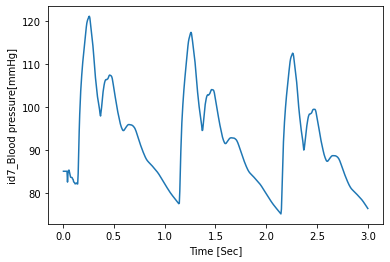

In [401]:
# シミュレーションデータの読み込み
# 今回は左上腕の血圧のみ用いる
dir_name = r"sim_output\20210802-081705"
csv_path =  dir_name+'.csv'
signal_df = pd.read_csv(csv_path)
x, y = 'Time [Sec]', 'id7_Blood pressure[mmHg]'
time = signal_df[x].values
raw_signal=signal_df[y].values
plt.plot(time, raw_signal)
plt.xlabel(x)
plt.ylabel(y)
signal_df.head()

In [402]:
# 信号の最大値と最小値を取得する
max_val, min_val = 0, 100000
for dir_name in extracted_df['dir'].values:
    csv_path=dir_name+'.csv'
    signal_df = pd.read_csv(csv_path)
    signal = signal_df[y].values
    max_val = np.max(signal) if max_val < np.max(signal) else max_val
    min_val = np.min(signal) if min_val > np.min(signal) else min_val

print("最大値=", max_val)
print("最小値=", min_val)

最大値= 121.0426
最小値= 73.68145


,signal,label
0,"[11.318550000000002, 11.318550000000002, 11.31...",0
1,"[11.318550000000002, 11.318550000000002, 11.31...",0
2,"[11.318550000000002, 11.318550000000002, 11.31...",0
3,"[11.318550000000002, 11.318550000000002, 11.31...",0
4,"[11.318550000000002, 11.318550000000002, 11.31...",0
...,...,...
283,"[11.318550000000002, 11.318550000000002, 11.31...",1
285,"[11.318550000000002, 11.318550000000002, 11.31...",0
288,"[11.318550000000002, 11.318550000000002, 11.31...",1
289,"[11.318550000000002, 11.318550000000002, 11.31...",0


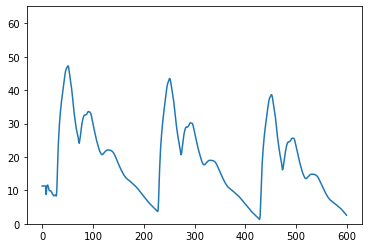

In [421]:
# 学習用のデータフレームを生成する

def get_signal(x):
    csv_path=x+'.csv'
    signal_df = pd.read_csv(csv_path)
    tar_col = 'id7_Blood pressure[mmHg]'
    signal_id7 = signal_df[tar_col].values
    return (signal_id7-min_val)

def get_label(x):
    return 1 if x>=high_thresh else 0

tar_df = pd.DataFrame(columns=['signal', 'label'])
tar_df['signal'] = extracted_df['dir'].map(get_signal)
tar_df['label'] = extracted_df['redu_ratio'].map(get_label)
plt.plot(tar_df['signal'].values[1])
plt.hist(tar_df['label'], bins=3)
tar_df

In [413]:
# TODO データ拡張


In [422]:
# DataLoaderの定義
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T

class BinarySignalDataset(Dataset):
    def __init__(self, df, device, augmentation=None):
        self.signals = df['signal'].values
        self.labels = df['label'].values
        self.augmentation = augmentation
        self.device = device
    
    def __len__(self):
        return len(self.signals)
    
    def __getitem__(self, index):
        signal = self.signals[index]
        label = self.labels[index]
        if self.augmentation is not None:
            signal = self.augmentation(signal)
        else:
            signal = signal.reshape((1, signal.shape[0]))
#             print(signal.shape)
            signal = torch.from_numpy(signal.astype(np.float32)).clone()
#             print(signal.shape)
        
        label = torch.Tensor([label])
        
        return signal, label

In [423]:
# モデルの定義
import torch.nn as nn
from torchsummary import summary

# 1d-CNNを用いる
signal = train_df['signal'].values
print(signal[0].shape)
class CNN_1D(nn.Module):
    def __init__(self):
        super(CNN_1D, self).__init__()
        # 600⇒150
        self.conv1 = nn.Sequential(
            nn.Conv1d(1, 4, kernel_size=5, padding='same'), 
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4))
        
        # 150⇒50
        self.conv2 = nn.Sequential(
            nn.Conv1d(4, 16, kernel_size=5, padding='same'),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=3))
        
        # 50⇒25
        self.conv3 = nn.Sequential(
            nn.Conv1d(16, 32, kernel_size=5, padding='same'),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2))
        
        self.fc1 = nn.Sequential(
            nn.Linear(32*25, 20),
            nn.ReLU())
        
        self.fc2 = nn.Linear(20, 1)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        
        
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)
        
        return out
        

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model = CNN_1D().to(device)
summary(model, (1, 600))

(600,)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 4, 600]              24
              ReLU-2               [-1, 4, 600]               0
         MaxPool1d-3               [-1, 4, 150]               0
            Conv1d-4              [-1, 16, 150]             336
              ReLU-5              [-1, 16, 150]               0
         MaxPool1d-6               [-1, 16, 50]               0
            Conv1d-7               [-1, 32, 50]           2,592
              ReLU-8               [-1, 32, 50]               0
         MaxPool1d-9               [-1, 32, 25]               0
          Flatten-10                  [-1, 800]               0
           Linear-11                   [-1, 20]          16,020
             ReLU-12                   [-1, 20]               0
           Linear-13                    [-1, 1]              21
Total params: 18,993
Trainable p

In [424]:
# 学習の準備
n_epoch=100
batch_size=8
train_df, val_df = train_test_split(tar_df, test_size=0.2, random_state=0)
print(len(train_df))
train_dataset = BinarySignalDataset(train_df, device)
val_dataset = BinarySignalDataset(val_df, device)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=0)

96


In [425]:
train_df

,signal,label
24,"[11.318550000000002, 11.318550000000002, 11.31...",0
128,"[11.318550000000002, 11.318550000000002, 11.31...",1
225,"[11.318550000000002, 11.318550000000002, 11.31...",0
59,"[11.318550000000002, 11.318550000000002, 11.31...",1
163,"[11.318550000000002, 11.318550000000002, 11.31...",1
...,...,...
160,"[11.318550000000002, 11.318550000000002, 11.31...",0
153,"[11.318550000000002, 11.318550000000002, 11.31...",1
285,"[11.318550000000002, 11.318550000000002, 11.31...",0
110,"[11.318550000000002, 11.318550000000002, 11.31...",0


In [426]:
# 学習
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


writer = SummaryWriter(comment='CNN_1d')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.BCEWithLogitsLoss()
sigmoid = nn.Sigmoid().to(device)

model = CNN_1D()
model.to(device)
for i in tqdm(range(n_epoch)):
    all_train_loss = []
    model.train()
    for data in train_loader:
        signals, labels = data
        signals, labels = signals.to(device), labels.to(device)        
        preds = model(signals)
        
        optimizer.zero_grad()
        train_loss = loss(preds, labels)
        train_loss.backward()
        optimizer.step()
#         print(preds)
        all_train_loss.append(train_loss.item())
    writer.add_scalar("loss/train", np.array(all_train_loss).mean(), i)
    
    
    # validation
    all_preds = list()
    all_labels = list()
    model.eval()
    max_score = 0
    with torch.no_grad():
        all_val_loss = []
        for data in val_loader:
            signals, labels = data
            signals, labels = signals.to(device), labels.to(device)
            
            preds = model(signals)
            val_loss = loss(preds, labels)
            # ログ
            preds = sigmoid(preds)
            preds = sigmoid(preds).detach().cpu().numpy()
            labels = labels.detach().cpu().numpy()
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            [all_preds.append(j) for j in preds.ravel()]
            [all_labels.append(j) for j in labels.ravel()]
            all_val_loss.append(val_loss.item())

    # 精度計算
#     print(all_preds)
#     print(all_labels)
    score = f1_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    writer.add_scalar("loss/val", np.array(all_val_loss).mean(), i)
    writer.add_scalar("acc/f1-score", score, i)
    writer.add_scalar("acc/precision", precision, i)
    writer.add_scalar("acc/recall", recall, i)
    tn, fp, fn, tp = confusion_matrix(all_labels, all_preds).flatten()
#     print('tp:', tp, '  fn:', fn, '  fp:', fp, '  tn:', tn)

#     print('f1_score: {:.03}'.format(score))

#     if max_score < score:
#         model_weights = model.state_dict()
#         max_score = score        

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.61it/s]


In [427]:
# 学習データに対する推論
all_preds = list()
all_labels = list()
all_preds_raw = list()
model.eval()
max_score = 0
with torch.no_grad():
    all_val_loss = []
    for data in train_loader:
        signals, labels = data
        signals, labels = signals.to(device), labels.to(device)

        preds = model(signals)
        preds = sigmoid(preds)
        val_loss = loss(preds, labels)
        # ログ
        preds = preds.detach().cpu().numpy()
        [all_preds_raw.append(j) for j in preds.ravel()]
        
        labels = labels.detach().cpu().numpy()
        preds[preds >= 0.5] = 1
        preds[preds < 0.5] = 0
        [all_preds.append(j) for j in preds.ravel()]
        [all_labels.append(j) for j in labels.ravel()]
        all_val_loss.append(val_loss.item())

# 精度計算
score = f1_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
writer.add_scalar("loss/val", np.array(all_val_loss).mean(), i)
writer.add_scalar("acc/f1-score", score, i)
writer.add_scalar("acc/precision", precision, i)
writer.add_scalar("acc/recall", recall, i)
tn, fp, fn, tp = confusion_matrix(all_labels, all_preds).flatten()
print('tp:', tp, '  fn:', fn, '  fp:', fp, '  tn:', tn)


tp: 46   fn: 0   fp: 50   tn: 0


[0.52850735, 0.52867204, 0.52869296, 0.5286177, 0.5287092, 0.5286752, 0.5286903, 0.5286849, 0.52868366, 0.5286032, 0.52869564, 0.5285227, 0.528679, 0.5286871, 0.52868944, 0.52869207, 0.52868587, 0.52868885, 0.5286777, 0.5286365, 0.5286179, 0.5286871, 0.52850914, 0.5286837, 0.52868557, 0.52866864, 0.5286872, 0.52868915, 0.5286267, 0.52870095, 0.5287066, 0.5287074, 0.528585, 0.52851695, 0.52851385, 0.5286753, 0.5287061, 0.52870065, 0.52852476, 0.52867204, 0.52868557, 0.5286879, 0.52864164, 0.5286309, 0.52863646, 0.5286685, 0.52862805, 0.52861786, 0.5286336, 0.52867943, 0.5286949, 0.52868974, 0.52868706, 0.5286336, 0.52868766, 0.5285171, 0.528689, 0.5286187, 0.5286353, 0.5286778, 0.5286825, 0.52868515, 0.52868474, 0.5286803, 0.5286885, 0.52868026, 0.5286189, 0.52868706, 0.52868557, 0.52867967, 0.5286179, 0.5287003, 0.5286826, 0.528692, 0.5287055, 0.52868575, 0.5287067, 0.52868766, 0.5286777, 0.52869487, 0.5285079, 0.52868485, 0.5286883, 0.52868843, 0.5286882, 0.52862805, 0.5286182, 0.5286

(0.0, 1.0)

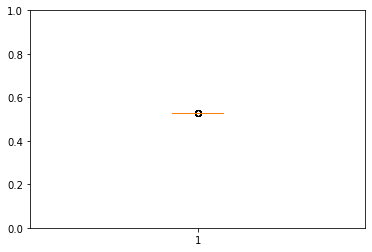

In [428]:
plt.boxplot(all_preds_raw)
print(all_preds_raw)
plt.ylim([0, 1])